## Initialization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
print((boston.data.shape))

(506, 13)


In [4]:
df_boston = pd.DataFrame(data = np.c_[boston['data'], boston['target']], columns = list(boston['feature_names']) + ['MEDV'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA (Exploratory Data Analysis)

In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(0, 14)

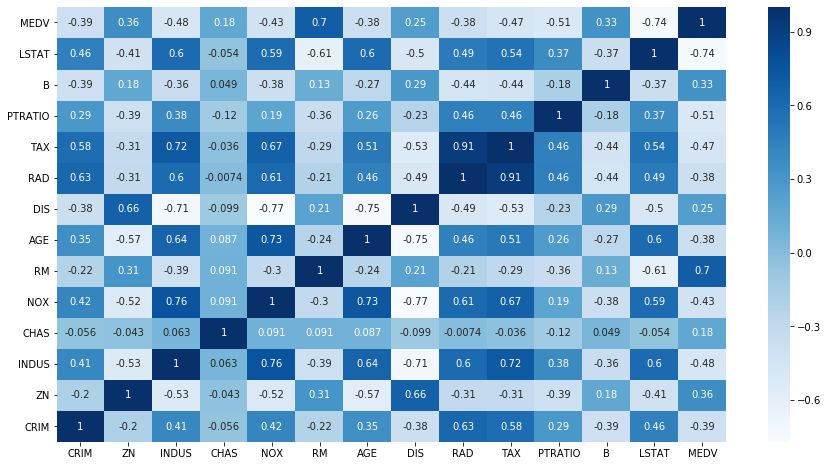

In [6]:
plt.figure(figsize = (15, 8))
hm   = sns.heatmap(df_boston.corr(), cmap="Blues", annot = True)
axes = hm.axes
axes.set_ylim(0, df_boston.corr().shape[0])
axes.set_ylim(0, df_boston.corr().shape[1])

## Simple Linear Regression

In [9]:
x = df_boston['RM'].values.reshape(-1, 1) #reshape digunakan untuk mengubah data tsb menjadi bentuk matriks
y = df_boston['MEDV'].values

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

##helper linear regression
LinearRegression?

In [19]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.coef_

array([9.10210898])

In [21]:
model.intercept_

-34.670620776438554

In [22]:
print('Prediksi harga rumah yang memiliki 12 kamar: {:.2f} $'.format(float(model.predict(np.array([[12]])))))

Prediksi harga rumah yang memiliki 12 kamar: 74.55 $


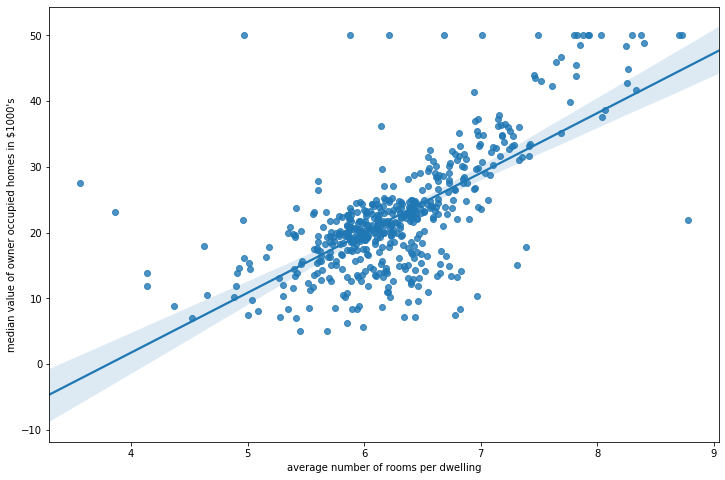

In [28]:
#draw regression line using regplot
plt.figure(figsize = (12, 8))
sns.regplot(x, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("median value of owner occupied homes in $1000's")
plt.show()

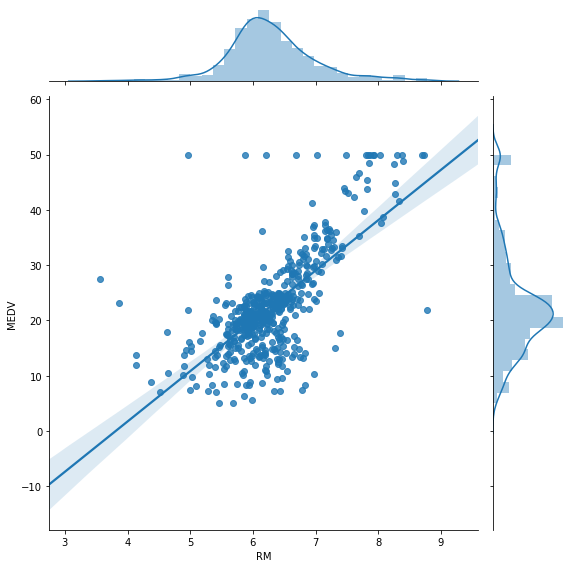

In [27]:
#show bar graphic to see data distribution
sns.jointplot(x = 'RM', y = 'MEDV', data=df_boston, kind='reg', size = 8)
plt.show()

## Evaluation of Regression

In [30]:
#memecah data menjadi data train (80%) dan data test (20%)
from sklearn.model_selection import train_test_split

x = df_boston.iloc[:, :-1].values
y = df_boston['MEDV'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred  = lr.predict(x_test)

print(y_train_pred)
print("------")
print(y_test_pred)

[32.55692655 21.92709478 27.54382573 23.60318829  6.57190962 14.94183849
 22.2234359  29.16492082 33.24362083 13.14592261 20.25607099 20.69823381
 12.65147525 23.36451045  5.04647867 19.82921197  9.41949932 44.64390988
 30.78308135 12.51377155 17.7083025  21.40137495 23.63206936 20.43451195
 35.01471208 13.84093827 21.04977584 35.15299117 19.43031106 13.17488144
 14.10200042 23.10677783 14.38600111 31.24428679 25.30231549 15.41257398
 24.21291852  9.40801187 14.94526286 20.83029825 32.74172958 27.96372521
 25.60836003 15.56419667 31.11934684 27.96958264 13.99703059  7.63346533
 28.4388332  25.33766463  4.52504654 28.38514306 17.1896917  29.74225124
 20.45365104 15.92613078 17.88247152 12.73233004  8.75151422 19.2087374
 34.49694507 32.94684483 23.67278817 19.55243904 22.8357545  26.87133257
 21.80817968 17.06379885 32.05027982 10.92397211 19.43423447 32.4854791
 18.83330461 15.95730389 18.64348601 14.44808929 24.60654801 24.2966726
 16.64095381 13.32850391 20.20307548 25.12819701 17.18

## Mean Squared Error (MSE)

Untuk menghitung seberapa besar error yang kita punya

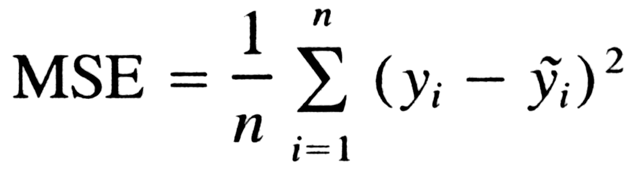

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [34]:
mean_squared_error(y_test, y_test_pred)

33.448979997676346

## Coefficient of Determination, R (square)

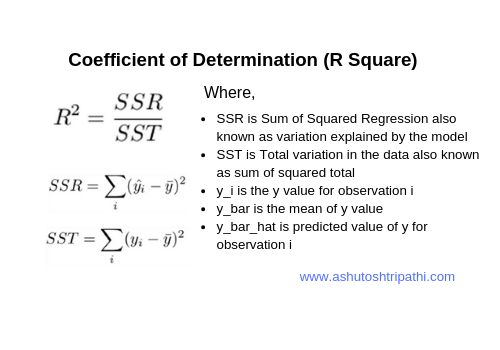

In [35]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.7730135569264234

In [36]:
r2_score(y_test, y_test_pred)

0.589222384918253